In [67]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets

In [68]:
olive = datasets.fetch_olivetti_faces()
olive['data']
olive['images']
olive['target']

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

In [69]:
data = olive['images']
target = olive['target']


In [70]:
print("There are {} images in the dataset".format(len(data)))
print("There are {} unique targets in the dataset".format(len(np.unique(target))))
print("Size of each image is {}x{}".format(data.shape[1],data.shape[2]))
print("Pixel values were scaled to [0,1] interval. e.g:{}".format(data[0][0,:4]))

There are 400 images in the dataset
There are 40 unique targets in the dataset
Size of each image is 64x64
Pixel values were scaled to [0,1] interval. e.g:[0.30991736 0.3677686  0.41735536 0.44214877]


In [71]:
print("unique target number:",np.unique(target))

unique target number: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


In [72]:
def show_40_distinct_people(images, unique_ids):
    fig, axarr=plt.subplots(nrows=4, ncols=10, figsize=(16,8 ))
    axarr=axarr.flatten()
    
    for unique_id in unique_ids:
        image_index=unique_id*10
        axarr[unique_id].imshow(images[image_index], cmap='gray')
        axarr[unique_id].set_xticks([])
        axarr[unique_id].set_yticks([])
        axarr[unique_id].set_title("face id:{}".format(unique_id))
    plt.suptitle("There are 40 distinct people in the dataset")

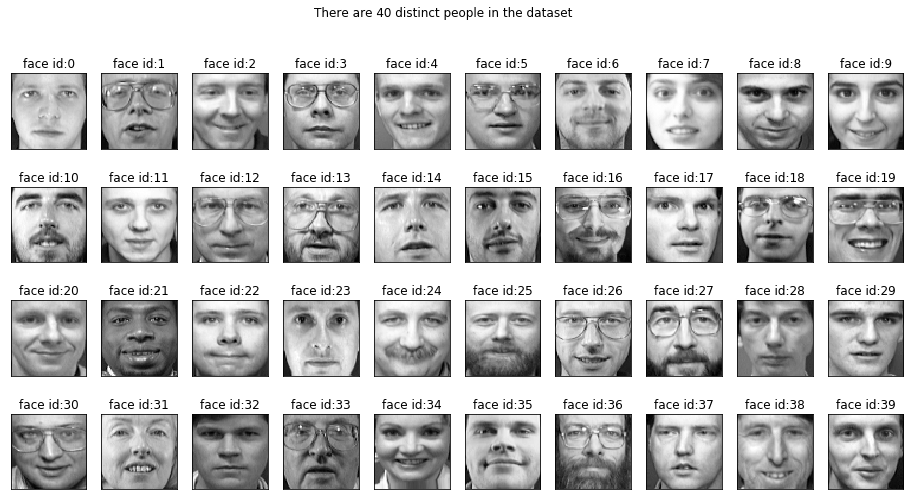

In [73]:
show_40_distinct_people(data, np.unique(target))

In [74]:
def show_10_faces_of_n_subject(images, subject_ids):
    cols=10
    rows=(len(subject_ids)*10)/cols 
    rows=int(rows)
    
    fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(16,8))
    
    for i, subject_id in enumerate(subject_ids):
        for j in range(cols):
            image_index=subject_id*10 + j
            axarr[i,j].imshow(images[image_index], cmap="gray")
            axarr[i,j].set_xticks([])
            axarr[i,j].set_yticks([])
            axarr[i,j].set_title("face id:{}".format(subject_id))
    

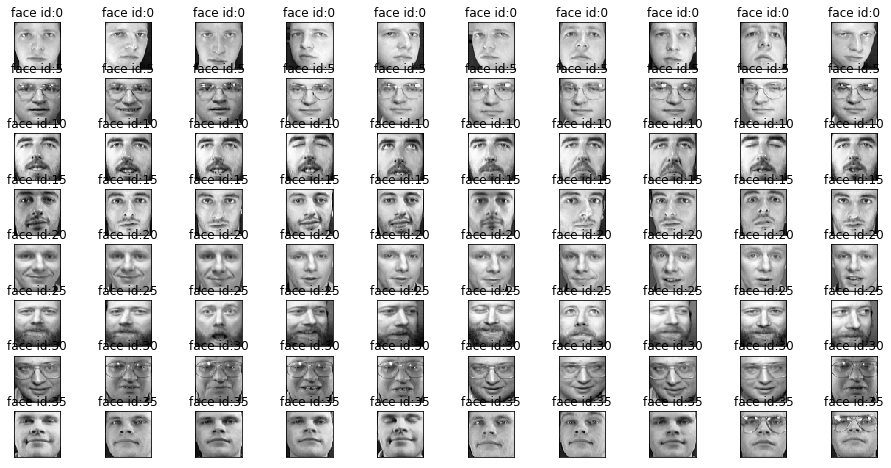

In [75]:
show_10_faces_of_n_subject(images=data, subject_ids=[0,5, 10, 15, 20, 25, 30, 35])

In [76]:
X=data.reshape((data.shape[0],data.shape[1]*data.shape[2]))
print("X shape:",X.shape)

X shape: (400, 4096)


In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, target, test_size=0.3, stratify=target, random_state=0)
print("X_train shape:",X_train.shape)
print("y_train shape:{}".format(y_train.shape))

X_train shape: (280, 4096)
y_train shape:(280,)


In [78]:
from sklearn.decomposition import PCA
pca=PCA(0.89) #decide the variance 
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=0.89, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [79]:
pca.n_components_ #checking the n_components on given variance

60

In [80]:
pca=PCA(pca.n_components_) # fitting it on the n_component which we got from deciding the variance
pca.fit(X)
X_pca = pca.transform(X)
pca.n_components_

60

In [81]:
pca.explained_variance_ 

array([18.840157  , 11.071773  ,  6.304622  ,  3.954588  ,  2.856046  ,
        2.4977095 ,  1.9200629 ,  1.6111586 ,  1.5492225 ,  1.3229516 ,
        1.2621089 ,  1.1369097 ,  0.986398  ,  0.90758973,  0.84092826,
        0.77355397,  0.7271427 ,  0.64526594,  0.5964515 ,  0.59100056,
        0.55270106,  0.48628193,  0.46199214,  0.45075357,  0.43213433,
        0.42079312,  0.40651953,  0.3922995 ,  0.36209378,  0.34905177,
        0.3180492 ,  0.30395406,  0.2863564 ,  0.2646404 ,  0.2534513 ,
        0.24997982,  0.24136108,  0.23622508,  0.22297977,  0.21668015,
        0.20519546,  0.20083742,  0.19318381,  0.18920507,  0.18229428,
        0.17872119,  0.17521033,  0.17397054,  0.16436185,  0.16097355,
        0.15424521,  0.14985783,  0.14499871,  0.13972634,  0.13714829,
        0.13526478,  0.131273  ,  0.12825267,  0.12515576,  0.11934178],
      dtype=float32)

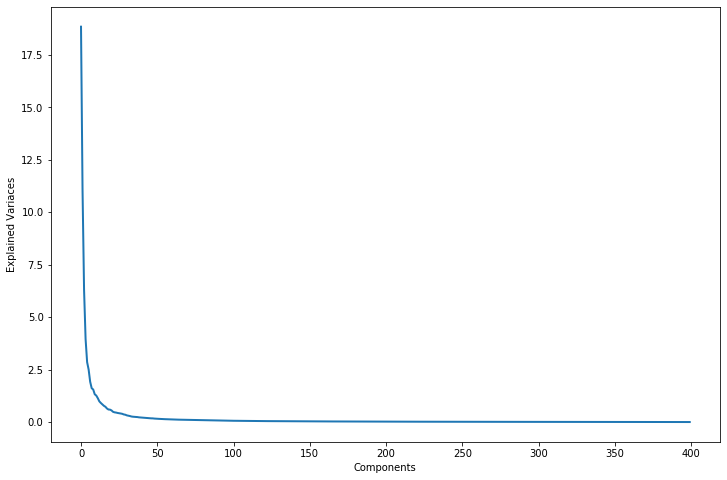

In [82]:
# by Visualisinng the graph we can decide the no_components or variance to be taken into account. So the best we could find is 90
pca=PCA()
pca.fit(X)

plt.figure(1, figsize=(12,8))

plt.plot(pca.explained_variance_, linewidth=2)
 
plt.xlabel('Components')
plt.ylabel('Explained Variaces')
plt.show()

In [83]:
n_components_ = 60

In [84]:
n_components = 60
pca=PCA(n_components=n_components, whiten=True)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=60, random_state=None,
    svd_solver='auto', tol=0.0, whiten=True)

In [85]:
len(pca.components_)

60

Text(0.5, 0.98, 'All Eigen Faces')

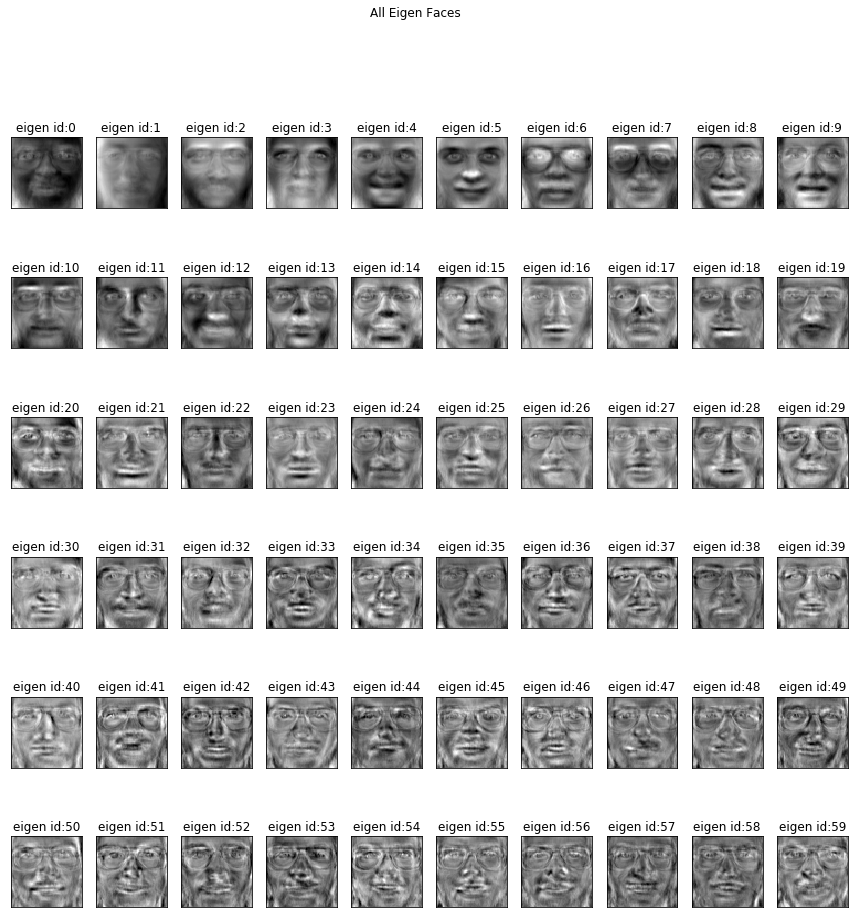

In [86]:
number_of_eigenfaces=len(pca.components_)
eigen_faces=pca.components_.reshape((number_of_eigenfaces, data.shape[1], data.shape[2]))

cols=10
rows=int(number_of_eigenfaces/cols)
fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))
axarr=axarr.flatten()
for i in range(number_of_eigenfaces):
    axarr[i].imshow(eigen_faces[i],cmap="gray")
    axarr[i].set_xticks([])
    axarr[i].set_yticks([])
    axarr[i].set_title("eigen id:{}".format(i))
plt.suptitle("All Eigen Faces".format(10*"=", 10*"="))